Linear filtering

## Dependencies 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import misc

In [2]:
%matplotlib notebook

## Test array / Test image

<IPython.core.display.Javascript object>


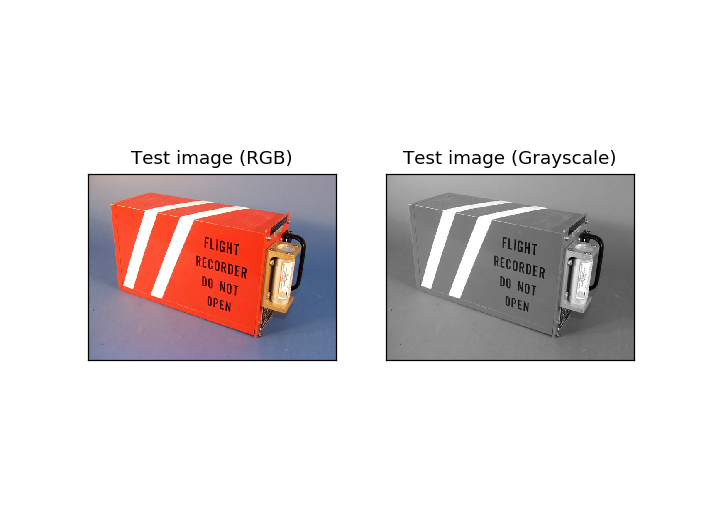

The test image consists of 450 rows and 600 columns in 3 channels
Image size (W x H) = 600 x 450


In [3]:
img_select = 'dfdr.jpg'
img = cv2.imread(img_select)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.subplot(1,2,1),plt.title('Test image (RGB)'),plt.xticks([]),plt.yticks([])
plt.imshow(img_rgb)
plt.subplot(1,2,2),plt.title('Test image (Grayscale)'),plt.xticks([]),plt.yticks([])
plt.imshow(img_gray,'gray',vmin=0,vmax=255)

img_rows = img.shape[0]
img_cols = img.shape[1]
img_chs = img.shape[2]

print('The test image consists of {} rows and {} columns in {} channels'.format(img_rows,img_cols,img_chs))
print('Image size (W x H) = {} x {}'.format(img_cols,img_rows))

# [1] Correlation Map (Pattern Search)

In [4]:
# Getting a mask from the image
f_mask = (1/255)*img_gray[157:338,423:506]

# Do the correlation
corr_map = signal.correlate2d(img_gray, f_mask, mode='same', boundary='fill', fillvalue=0)

<IPython.core.display.Javascript object>


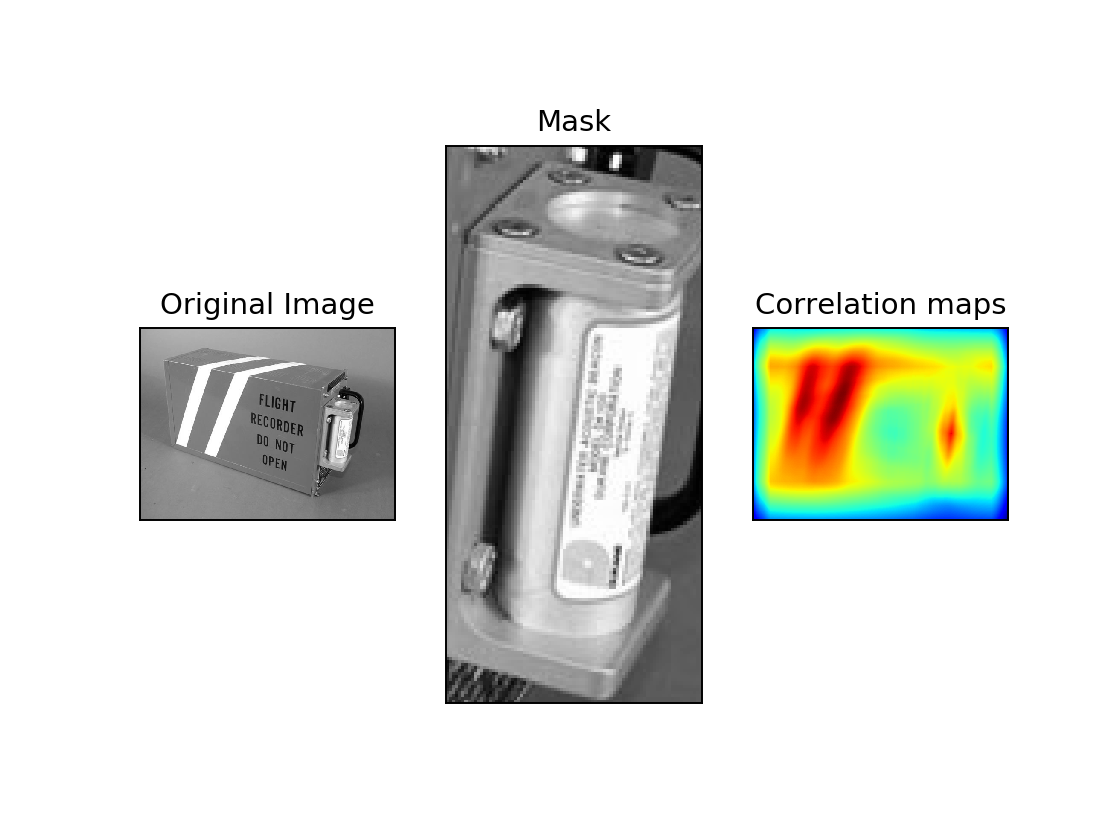

In [5]:
plt.figure(2)
plt.subplot(1,3,1),plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.imshow(img_gray,'gray')

plt.subplot(1,3,2),plt.title('Mask'),plt.xticks([]),plt.yticks([])
plt.imshow(f_mask,'gray')

plt.subplot(1,3,3),plt.title('Correlation maps'),plt.xticks([]),plt.yticks([])
plt.imshow(corr_map,'jet')

# [2] Edge detection (Sobel,Robert,Prewitt,Laplacian)

In [9]:
# Sobel filter's coefficients

sobel_wx = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])

sobel_wy = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])

# Robert filter's coefficients
robert_p45 = np.array([[-1,0],
                       [0,1]])

robert_n45 = np.array([[0,-1],
                       [1,0]])

# Prewitt filter's coefficients
prewitt_wx = np.array([[-1,-1,-1],
                       [0,0,0],
                       [1,1,1]])

prewitt_wy = np.array([[-1,0,1],
                       [-1,0,1],
                       [-1,0,1]])

# Laplacian operator's coefficients
laplacian_w = np.array([[ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0]])

In [10]:
# Convolution Operations
sobel_gradient_x = signal.convolve2d(img_gray, sobel_wx, mode='same', boundary='fill', fillvalue=0)
sobel_gradient_y = signal.convolve2d(img_gray, sobel_wy, mode='same', boundary='fill', fillvalue=0)
sobel_output = np.sqrt(np.power(sobel_gradient_x, 2) + np.power(sobel_gradient_y, 2))
sobel_output_max = np.max(sobel_output)
sobel_output = sobel_output/sobel_output_max*255

robert_output_p45 = signal.convolve2d(img_gray, robert_p45, mode='same', boundary='fill', fillvalue=0)
robert_output_n45 = signal.convolve2d(img_gray, robert_n45, mode='same', boundary='fill', fillvalue=0)

robert_output_p45 = np.sqrt(np.power(robert_output_p45,2))
robert_output_n45 = np.sqrt(np.power(robert_output_n45,2))

prewitt_gradient_x = signal.convolve2d(img_gray, prewitt_wx, mode='same', boundary='fill', fillvalue=0)
prewitt_gradient_y = signal.convolve2d(img_gray, prewitt_wy, mode='same', boundary='fill', fillvalue=0)
prewitt_output = np.sqrt(np.power(prewitt_gradient_x, 2) + np.power(prewitt_gradient_y, 2))
prewitt_output_max = np.max(prewitt_output)
prewitt_output = prewitt_output/prewitt_output_max*255

laplacian_output = signal.convolve2d(img_gray, laplacian_w, mode='same', boundary='fill', fillvalue=0)
laplacian_output_max = np.max(laplacian_output)
laplacian_output = laplacian_output*255/laplacian_output_max

<IPython.core.display.Javascript object>


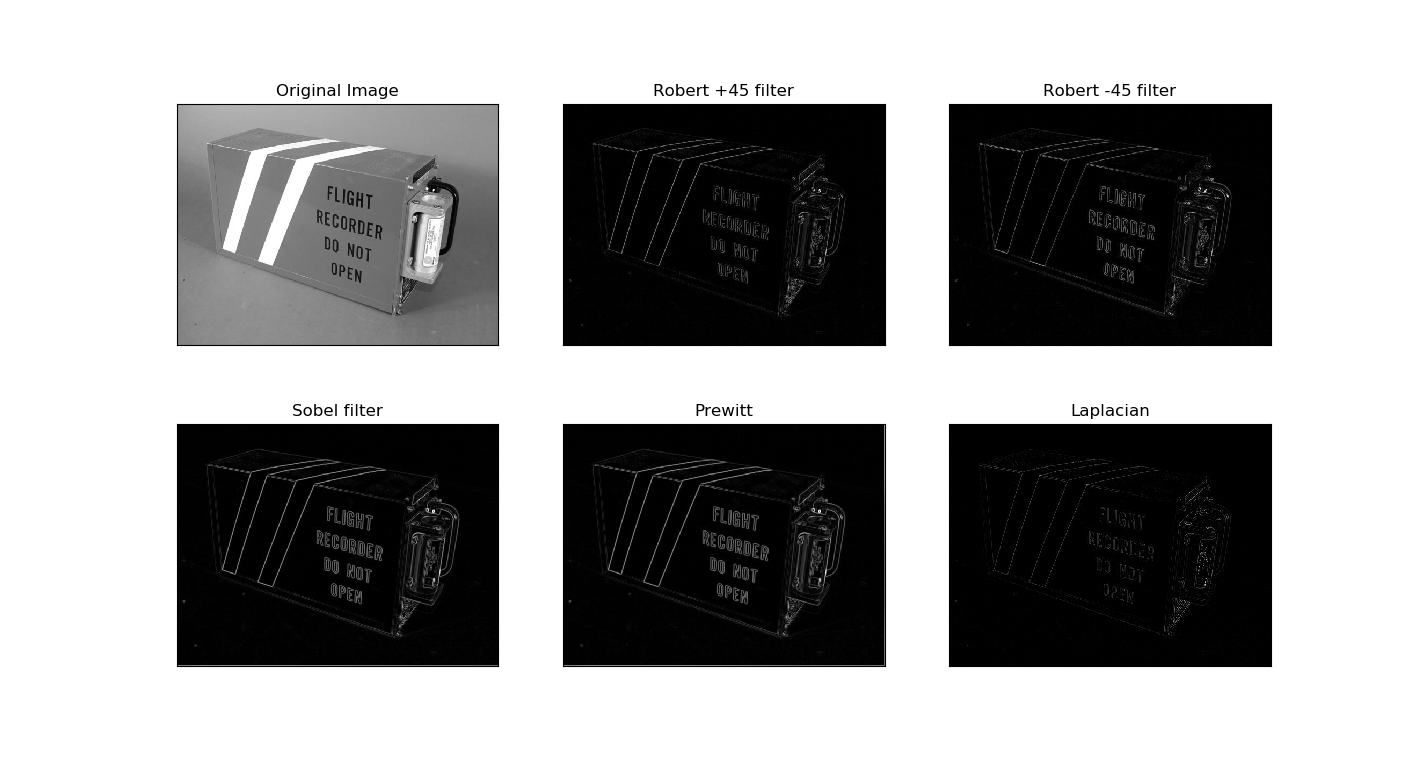

In [11]:
plt.figure(3)
plt.subplot(2,3,1),plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.imshow(img_gray,'gray')

plt.subplot(2,3,2),plt.title('Robert +45 filter'),plt.xticks([]),plt.yticks([])
plt.imshow(robert_output_p45,'gray')

plt.subplot(2,3,3),plt.title('Robert -45 filter'),plt.xticks([]),plt.yticks([])
plt.imshow(robert_output_n45,'gray')

plt.subplot(2,3,4),plt.title('Sobel filter'),plt.xticks([]),plt.yticks([])
plt.imshow(sobel_output,'gray');

plt.subplot(2,3,5),plt.title('Prewitt'),plt.xticks([]),plt.yticks([])
plt.imshow(prewitt_output,'gray');

plt.subplot(2,3,6),plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.imshow(laplacian_output,'gray',vmin=0,vmax=255);

In [12]:
# Save the output images
cv2.imwrite('01_original.jpg',img_gray);
cv2.imwrite('02_robert_p45.jpg',robert_output_p45);
cv2.imwrite('03_robert_n45.jpg',robert_output_n45);
cv2.imwrite('04_sobel.jpg',sobel_output);
cv2.imwrite('05_prewitt.jpg',prewitt_output);
cv2.imwrite('06_laplacian.jpg',laplacian_output);

# [3] Image Sharpening (Using edges from Sobel filter)

In [13]:
sharpening_factor = 0.5               #--- max = 1

img_sharp = img_gray + sobel_output*sharpening_factor
img_sharp_max = np.max(img_sharp)
img_sharp = img_sharp*255/img_sharp_max

<IPython.core.display.Javascript object>


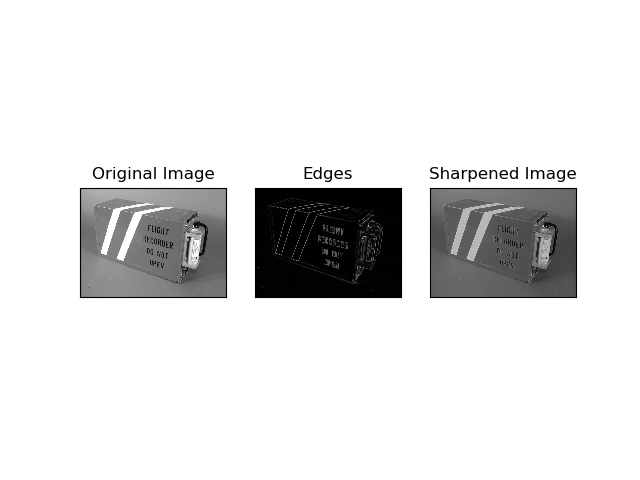

In [14]:
plt.figure(4)
plt.subplot(1,3,1),plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.imshow(img_gray,'gray')

plt.subplot(1,3,2),plt.title('Edges'),plt.xticks([]),plt.yticks([])
plt.imshow(sobel_output,'gray')

plt.subplot(1,3,3),plt.title('Sharpened Image'),plt.xticks([]),plt.yticks([])
plt.imshow(img_sharp,'gray')

cv2.imwrite('07_sharpen_before.jpg',img_gray);
cv2.imwrite('08_sharpen_after.jpg',img_sharp);

# [4] Edge detection (Blur subtraction method)

In [15]:
# creation of gaussian filter
window_size = 10
variance = 5

x = np.arange(-(window_size-1)/2,window_size/2,1)
y = np.arange(-(window_size-1)/2,window_size/2,1)

x_ax, y_ax = np.meshgrid(x, y,indexing='ij')

img_original = img_gray/np.max(img_gray)*255

h_gaussian = (1/(2*np.pi*np.power(variance,2)))*np.exp(-1*(np.power(x_ax,2)+np.power(y_ax,2))/(2*np.power(variance,2)));

img_blur = signal.convolve2d(img_original, h_gaussian, mode='same', boundary='fill', fillvalue=0)
img_blur = img_blur/np.max(img_blur)*255

img_edges = img_original - img_blur

<IPython.core.display.Javascript object>


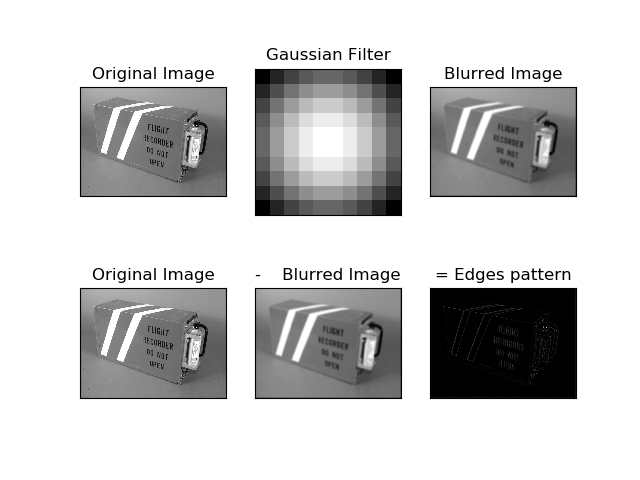

In [16]:
plt.figure(5)
plt.subplot(2,3,1),plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.imshow(img_gray,'gray')

plt.subplot(2,3,2),plt.title('Gaussian Filter'),plt.xticks([]),plt.yticks([])
plt.imshow(h_gaussian,'gray')

plt.subplot(2,3,3),plt.title('Blurred Image'),plt.xticks([]),plt.yticks([])
plt.imshow(img_blur,'gray')

plt.subplot(2,3,4),plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.imshow(img_gray,'gray')

plt.subplot(2,3,5),plt.title('-    Blurred Image'),plt.xticks([]),plt.yticks([])
plt.imshow(img_blur,'gray')

plt.subplot(2,3,6),plt.title('= Edges pattern'),plt.xticks([]),plt.yticks([])
plt.imshow(img_edges,'gray',vmin=0,vmax=255)

cv2.imwrite('09_blurred.jpg',img_blur);
cv2.imwrite('10_edges_from_blurred.jpg',img_edges);